In [1]:
# or they are being followed by (either of 372 nodes are following) are following them 
    #-- can be checked main G graph (representing follwoing network)

In [168]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import ast

In [132]:
# gsubgraph from which we are checking all the followers of the tatto node
G_tattoo_cascade = nx.read_edgelist("tattoo.edgelist",create_using=nx.DiGraph())

In [8]:
# the main graph in which 
G = nx.read_edgelist("user-user_c.edgelist",create_using=nx.DiGraph())

In [10]:
tattoo_node = '1394686213'

In [65]:
# getting all incidinet on the tattoo node
first_level_nodes = ([node[1] for node in G_tattoo_cascade.out_edges('1394686213')] + [node[0] for node in G_tattoo_cascade.in_edges('1394686213')])

In [66]:
first_level_nodes = [int(node) for node in first_level_nodes]

In [46]:
# getting the remaining users for level 2
df_user= pd.read_csv("/home/akshayuppal3/hexagonData.csv",lineterminator="\n")

In [50]:
# so we found two tweets based om the above graph that have been retweeted a lot
df_tweets_sub = df_user[df_user['retweetCount'] >=100]
# using the heagon data of the 7k users..

In [54]:
df_tattoo = df_tweets_sub[df_tweets_sub.retweetCount == 781]
len(df_tattoo.userID.unique())

598

In [70]:
## 598 -358  = 240
rem_users = set(df_tattoo.userID.unique()) - set(first_level_nodes)
# so these users dont have a direct conenction with the tattoo node so we will look at the following graph of the first
# level node and check if they are present in their following network

In [103]:
# reming the source from reamining node..
rem_users.remove(tattoo_node)

In [105]:
rem_users = [str(node) for node in rem_users]
first_level_nodes = [str(node) for node in first_level_nodes]

In [106]:
with open("tattoo_1_lvl_following.edgelist","w+") as f:
    for node in tqdm(first_level_nodes):
        # get the following .. hence the outdegree of those nodes
        node 
        if (node) in G.nodes():
            following = [i[1] for i in G.out_edges(node)]
            for user in rem_users:
                if (user) in following:
                    f.write(node + ' ' + user +'\n')

100%|██████████| 372/372 [00:00<00:00, 4785.84it/s]


In [120]:
G_test = nx.read_edgelist("tattoo_1_lvl_following.edgelist",create_using=nx.DiGraph())

In [131]:
len(G_test.edges())

39

In [134]:
G_tattoo_cascade.add_edges_from(G_test.edges())

In [137]:
color_map = list()
for node in G_tattoo_cascade.nodes():
    if node != (tattoo_node):
        if node in rem_users:
            color_map.append("blue")
        else:
            color_map.append("red")
    else:
        color_map.append("yellow")

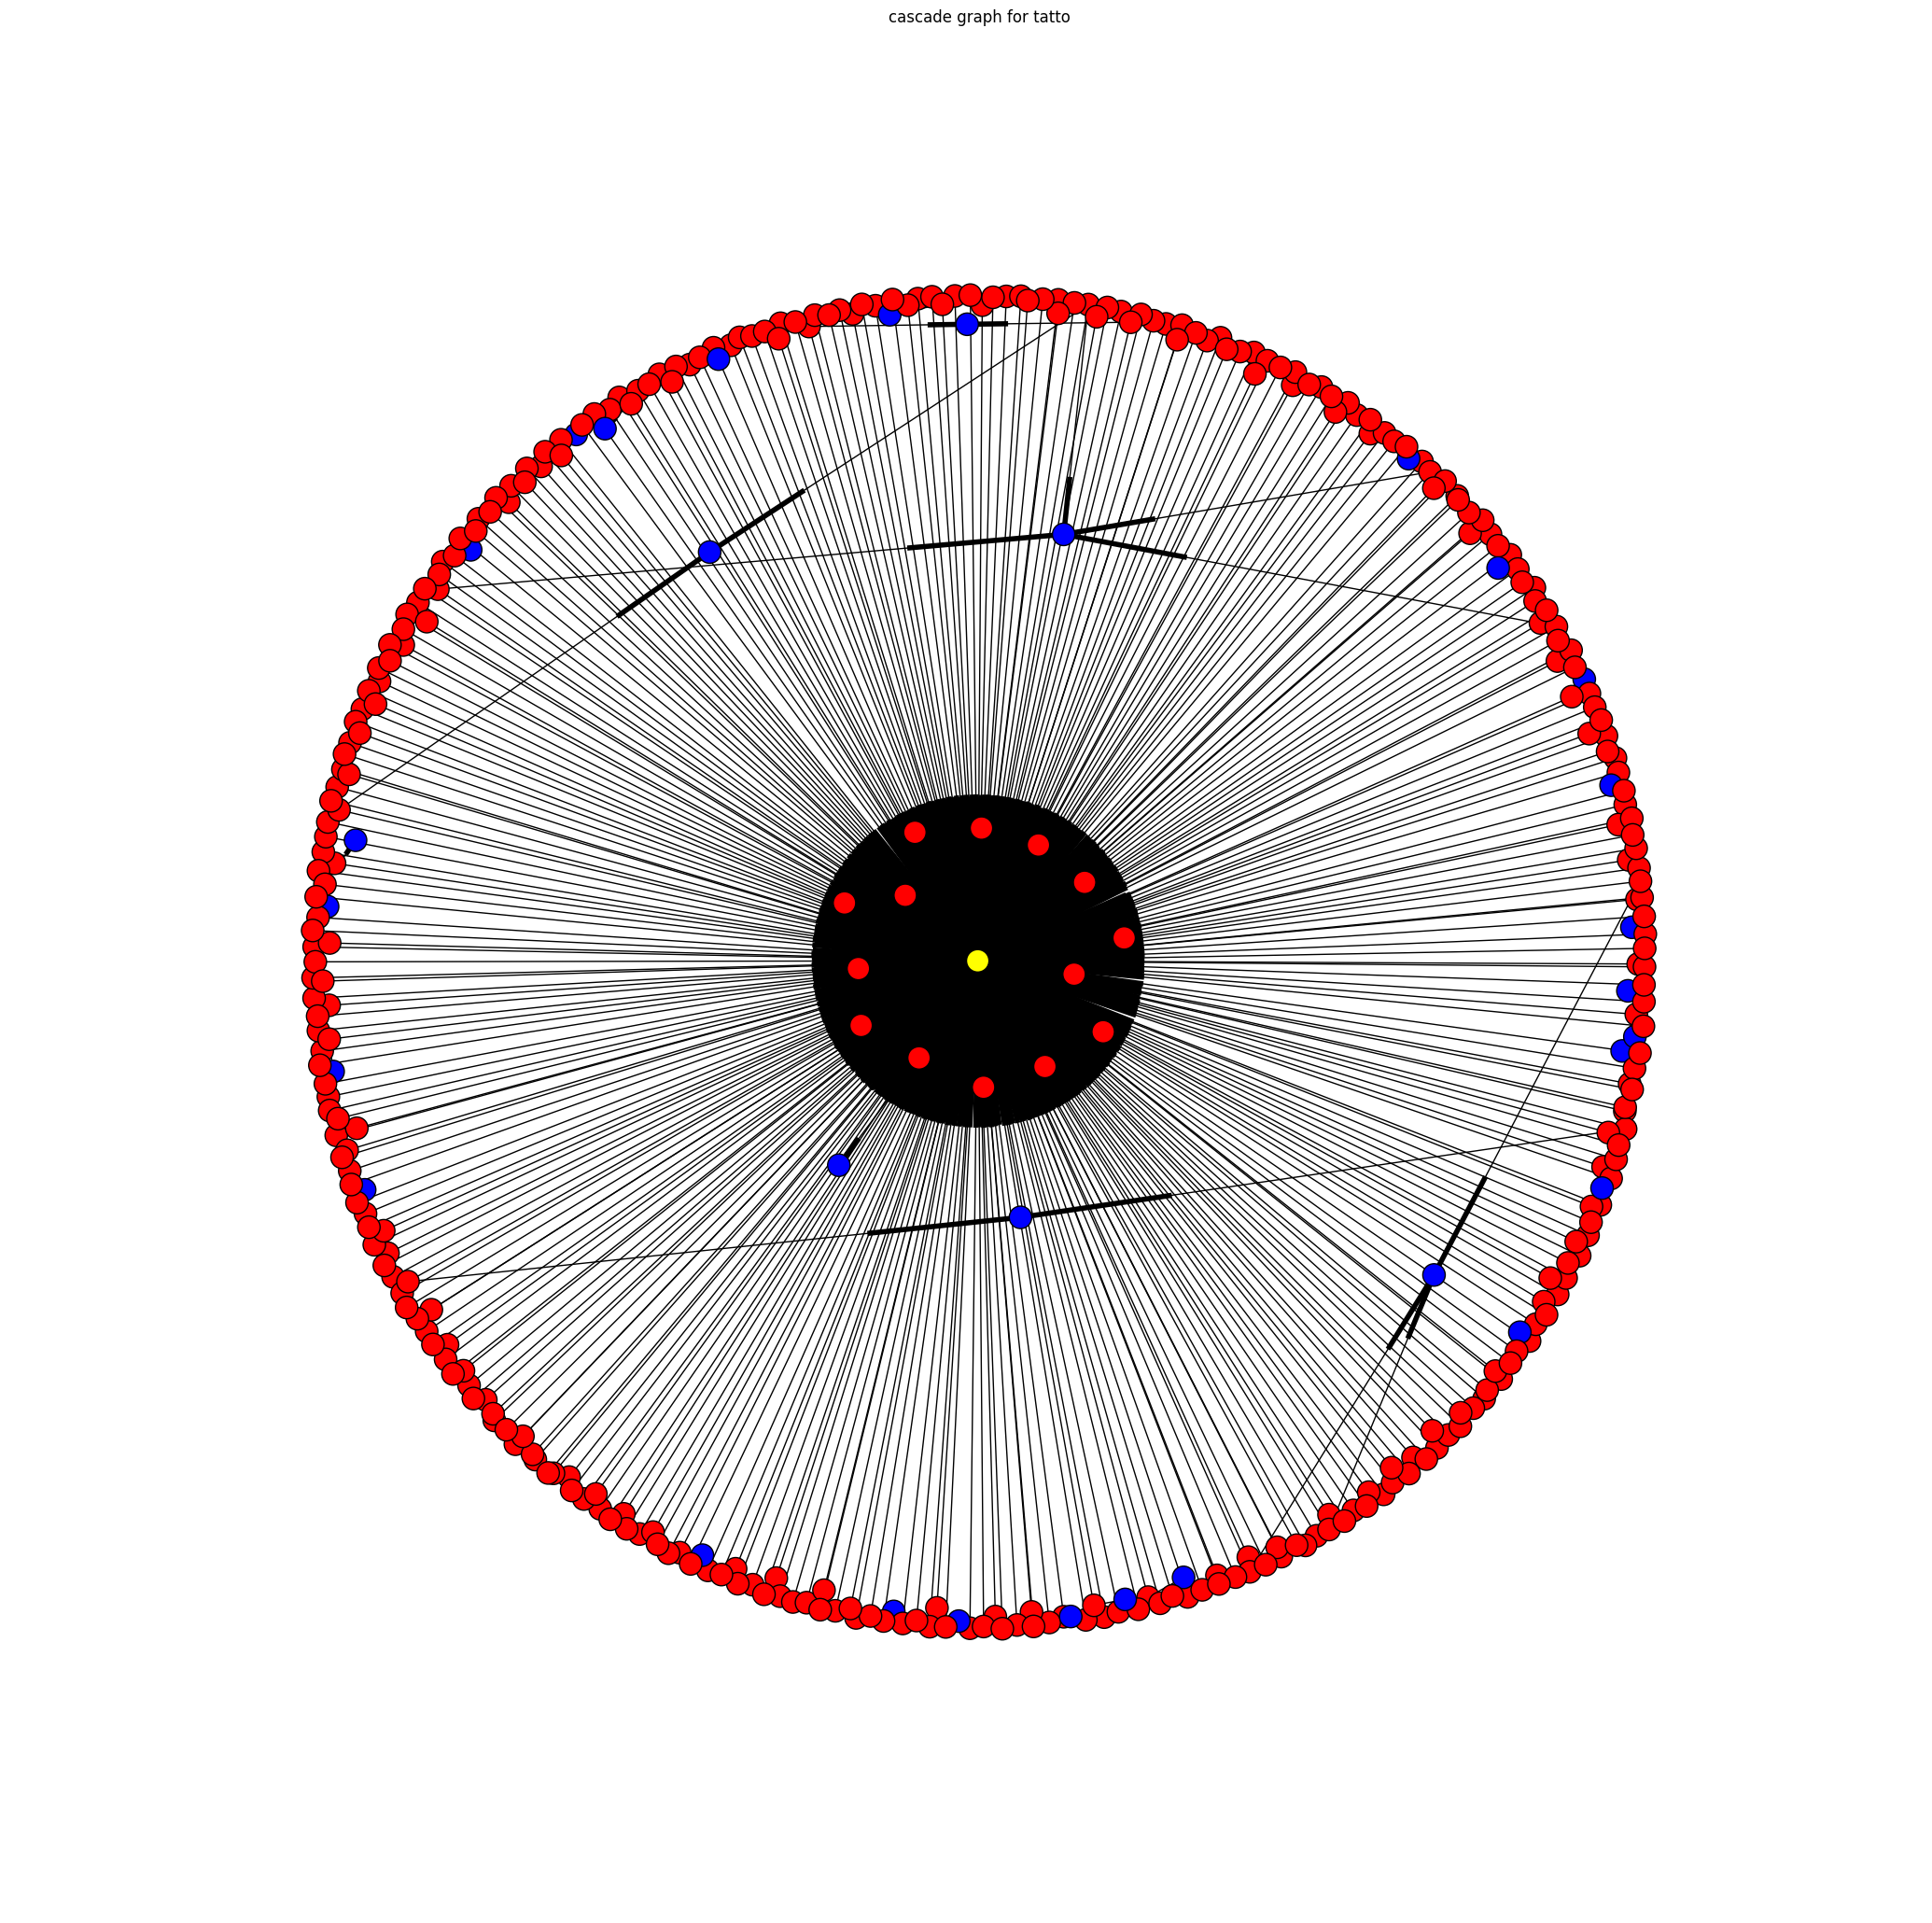

In [152]:
# 2nd level cascade
plt.figure(figsize=(20,20))
nx.draw(G_tattoo_cascade,node_color=color_map)
plt.title("cascade graph for tatto")
plt.show()

In [153]:
len(G_tattoo_cascade.edges())

411

In [154]:
## so 598 - 411 = 187 so we still remain these nodes might get from the following network

In [160]:
## so lets try with the remaining followers network
followers_network = pd.read_csv("~/twitter_juul/input/followers_tattoo",index_col=0)

In [167]:
first_level_users = list(followers_network.userID)

In [185]:
with open("tatto_1st_lvl_followers.edgelist","w+"):
    for user in tqdm(rem_users):
        for node in first_level_users:
            followers = ast.literal_eval(followers_network.followers_list[followers_network.userID == node].values[0])[0]
            if user in set(followers):
                f.write(str(user) + " " + str(node) +"\n")

100%|██████████| 239/239 [03:12<00:00,  1.24it/s]


In [186]:
G_temp =  nx.read_edgelist("tatto_1st_lvl_followers.edgelist",create_using=nx.DiGraph())

In [187]:
G_tattoo_cascade.add_edges_from(G_test.edges())